In [ ]:
%pip install seaborn

     -------------------------------------- 294.9/294.9 KB 2.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Lattae\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [2]:
%pip install imbalanced-learn

   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   ------ --------------------------------- 41.0/258.3 kB 1.9 MB/s eta 0:00:01
   ----------------------- ---------------- 153.6/258.3 kB 2.3 MB/s eta 0:00:01
   ---------------------------------------- 258.3/258.3 kB 2.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import joblib
import h5py
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
data = pd.read_csv("./Dataset/Dataset Kasus Pencurian.csv")
data

,TEMPAT KEJADIAN PENCURIAN,WAKTU KEJADIAN,PELAKU MENGGUNAKAN ALAT,SASARAN KEJAHATAN,JUMLAH KERUGIAN,Modus Operandi,JENIS PENCURIAN
0,AREA PARKIR,PAGI,YA,GABUNGAN,BESAR,MERUSAK KUNCI,CURAT
1,AREA PARKIR,MALAM,YA,BENDA BERGERAK,BESAR,MERUSAK KUNCI,CURAT
2,JALAN RAYA,MALAM,TIDAK,BENDA TIDAK BERGERAK,KECIL,MERAMPAS,CURAS
3,HALAMAN RUMAH,PAGI,YA,BENDA BERGERAK,BESAR,MERUSAK KUNCI,CURAT
4,DALAM RUMAH,SIANG,TIDAK,BENDA TIDAK BERGERAK,BESAR,MENGAMBIL,CUBIS
...,...,...,...,...,...,...,...
1666,DALAM RUMAH,DINI HARI,TIDAK,BENDA TIDAK BERGERAK,BESAR,MENGAMBIL,CUBIS
1667,DALAM RUMAH,PAGI,TIDAK,BENDA TIDAK BERGERAK,BESAR,MENGAMBIL,CUBIS
1668,DALAM RUMAH,MALAM,TIDAK,BENDA TIDAK BERGERAK,BESAR,MENGAMBIL,CUBIS
1669,DALAM RUMAH,MALAM,TIDAK,BENDA TIDAK BERGERAK,BESAR,MENGAMBIL,CUBIS


In [3]:
# information of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1671 entries, 0 to 1670
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   TEMPAT KEJADIAN PENCURIAN  1671 non-null   object
 1   WAKTU KEJADIAN             1671 non-null   object
 2   PELAKU MENGGUNAKAN ALAT    1671 non-null   object
 3   SASARAN KEJAHATAN          1671 non-null   object
 4   JUMLAH KERUGIAN            1671 non-null   object
 5   Modus Operandi             1671 non-null   object
 6   JENIS PENCURIAN            1671 non-null   object
dtypes: object(7)
memory usage: 91.5+ KB


In [4]:
# Data of values(Max, min, std...)
data.describe()

,TEMPAT KEJADIAN PENCURIAN,WAKTU KEJADIAN,PELAKU MENGGUNAKAN ALAT,SASARAN KEJAHATAN,JUMLAH KERUGIAN,Modus Operandi,JENIS PENCURIAN
count,1671,1671,1671,1671,1671,1671,1671
unique,8,5,2,3,2,10,3
top,AREA PARKIR,PAGI,YA,BENDA BERGERAK,BESAR,MERUSAK KUNCI,CURAT
freq,636,446,1089,966,1490,951,1031


In [5]:
# Columns of data
rename_columns = {
    'TEMPAT KEJADIAN PENCURIAN': 'tempat_kejadian_pencurian',
    'WAKTU KEJADIAN': 'waktu_kejadian',
    'PELAKU MENGGUNAKAN ALAT': 'pelaku_menggunakan_alat',
    'SASARAN KEJAHATAN' : 'sasaran_kejahatan',
    'JUMLAH KERUGIAN' : 'jumlah_kerugian',
    'Modus Operandi' : 'mo',
    'JENIS PENCURIAN' : 'jenis_pencurian'
}
data.rename(columns=rename_columns, inplace=True)

data.columns

Index(['tempat_kejadian_pencurian', 'waktu_kejadian',
       'pelaku_menggunakan_alat', 'sasaran_kejahatan', 'jumlah_kerugian', 'mo',
       'jenis_pencurian'],
      dtype='object')

C:\Users\Lattae\AppData\Local\Temp\ipykernel_760\4036815474.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="jenis_pencurian", data=data, palette=plt_colors.values())


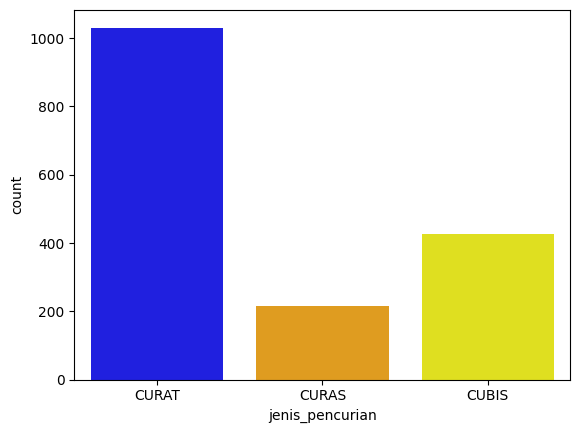

jenis_pencurian
CURAT    1031
CUBIS     425
CURAS     215
Name: count, dtype: int64

In [6]:
# Define custom colors for each gender category
plt_colors = {"CUBIS": "blue", "CURAT": "orange", "CURAS": "yellow"}

# The number of gender in the dataset and its graphic.
sns.countplot(x="jenis_pencurian", data=data, palette=plt_colors.values())
plt.show()

data.loc[:,"jenis_pencurian"].value_counts()

In [7]:
data

,tempat_kejadian_pencurian,waktu_kejadian,pelaku_menggunakan_alat,sasaran_kejahatan,jumlah_kerugian,mo,jenis_pencurian
0,AREA PARKIR,PAGI,YA,GABUNGAN,BESAR,MERUSAK KUNCI,CURAT
1,AREA PARKIR,MALAM,YA,BENDA BERGERAK,BESAR,MERUSAK KUNCI,CURAT
2,JALAN RAYA,MALAM,TIDAK,BENDA TIDAK BERGERAK,KECIL,MERAMPAS,CURAS
3,HALAMAN RUMAH,PAGI,YA,BENDA BERGERAK,BESAR,MERUSAK KUNCI,CURAT
4,DALAM RUMAH,SIANG,TIDAK,BENDA TIDAK BERGERAK,BESAR,MENGAMBIL,CUBIS
...,...,...,...,...,...,...,...
1666,DALAM RUMAH,DINI HARI,TIDAK,BENDA TIDAK BERGERAK,BESAR,MENGAMBIL,CUBIS
1667,DALAM RUMAH,PAGI,TIDAK,BENDA TIDAK BERGERAK,BESAR,MENGAMBIL,CUBIS
1668,DALAM RUMAH,MALAM,TIDAK,BENDA TIDAK BERGERAK,BESAR,MENGAMBIL,CUBIS
1669,DALAM RUMAH,MALAM,TIDAK,BENDA TIDAK BERGERAK,BESAR,MENGAMBIL,CUBIS


In [8]:
# Change tempat kejadian into numeric
data['tempat_kejadian_pencurian'] = data['tempat_kejadian_pencurian'].map({'AREA JALAN RAYA': 0, 'AREA PARKIR': 1, 'DALAM RUMAH': 2, 'GANG RUMAH': 3, 'HALAMAN RUMAH': 4, 'JALAN RAYA': 5, 'parkiran rumah': 6, 'SEKOLAH': 7})

# Change waktu kejadian into numeric
data['waktu_kejadian'] = data['waktu_kejadian'].map({'DINI HARI': 0, 'MALAM': 1, 'PAGI': 2, 'SIANG': 3, 'SORE': 4})

# Change pelaku menggunakan alat into numeric
data['pelaku_menggunakan_alat'] = data['pelaku_menggunakan_alat'].map({'YA': 0, 'TIDAK': 1})

# Change sasaran kejahatan into numeric
data['sasaran_kejahatan'] = data['sasaran_kejahatan'].map({'BENDA BERGERAK': 0, 'BENDA TIDAK BERGERAK': 1, 'GABUNGAN': 2})

# Change pelaku menggunakan alat into numeric
data['jumlah_kerugian'] = data['jumlah_kerugian'].map({'BESAR': 0, 'KECIL': 1})

# Change mo into numeric
data['mo'] = data['mo'].map({'MENGAMBIL': 0, 'MENGANCAM': 1, 'MENYELINAP': 2, 'MERAMPAS': 3, 'merusak atm': 4, 'merusak brankas': 5, 'MERUSAK KUNCI': 6, 'MERUSAK RUMAH': 7, 'PANJAT TEMBOK': 8, 'PECAH KACA': 9})

# Change jenis_pencurian into numeric
data['jenis_pencurian'] = data['jenis_pencurian'].map({'CUBIS': 0, 'CURAT': 1, 'CURAS': 2})

# Display the first few rows to verify the changes
data.head(6)

,tempat_kejadian_pencurian,waktu_kejadian,pelaku_menggunakan_alat,sasaran_kejahatan,jumlah_kerugian,mo,jenis_pencurian
0,1,2,0,2,0,6,1
1,1,1,0,0,0,6,1
2,5,1,1,1,1,3,2
3,4,2,0,0,0,6,1
4,2,3,1,1,0,0,0
5,1,1,0,0,0,6,1


In [9]:
# Assuming 'data' is your DataFrame
data.to_csv('./Dataset/transformed_data.csv', index=False)

In [10]:
# x data
x_data = data.drop(['jenis_pencurian'], axis = 1)

# y data
y_data = data.jenis_pencurian.values

# Display x & y data
x_data
y_data

array([1, 1, 2, ..., 0, 0, 0], dtype=int64)

In [11]:
# Train test split
x_train, x_test, y_train, y_test = train_test_split(x_data,
y_data, test_size = 0.3, random_state=1)

In [12]:
# Oversample the training data using SMOTE
smote = SMOTE(random_state=1)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

C:\Users\Lattae\AppData\Local\Temp\ipykernel_760\961757354.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, palette=plt_colors.values())


Text(0, 0.5, 'Count')

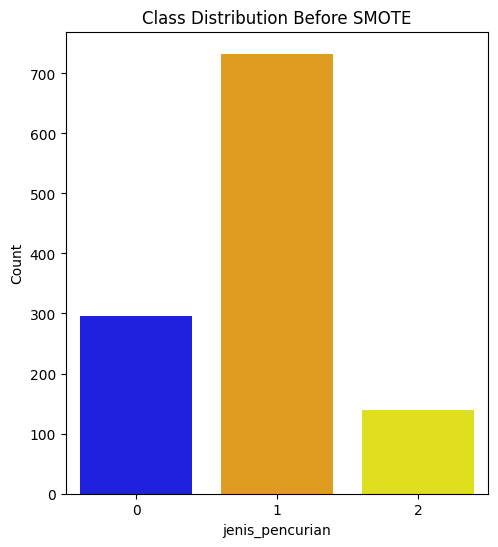

In [14]:
# Visualize class distribution before SMOTE
plt.figure(figsize=(12, 6))

# Define custom colors for each gender category
plt_colors = {0: "blue", 1: "orange", 2: "yellow"}

plt.subplot(1, 2, 1)
sns.countplot(x=y_train, palette=plt_colors.values())
plt.title("Class Distribution Before SMOTE")
plt.xlabel("jenis_pencurian")
plt.ylabel("Count")

C:\Users\Lattae\AppData\Local\Temp\ipykernel_760\1075871914.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train_smote, palette=plt_colors.values())


Text(0, 0.5, 'Count')

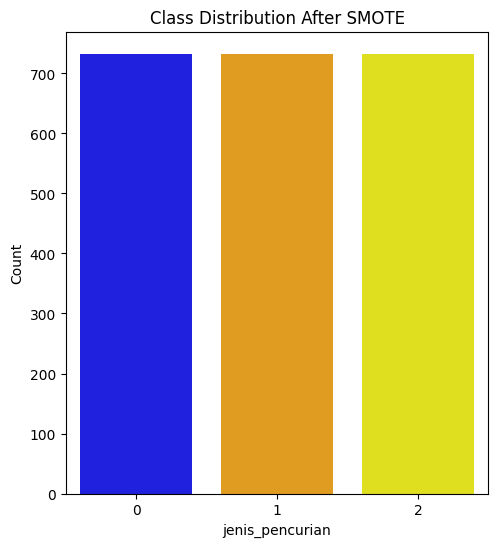

In [15]:
# Visualize class distribution before SMOTE
plt.figure(figsize=(12, 6))

# Define custom colors for each gender category
plt_colors = {0: "blue", 1: "orange", 2: "yellow"}

plt.subplot(1, 2, 1)
sns.countplot(x=y_train_smote, palette=plt_colors.values())
plt.title("Class Distribution After SMOTE")
plt.xlabel("jenis_pencurian")
plt.ylabel("Count")

In [24]:
# Gaussian Naïve Bayes
gnb = GaussianNB()
gnb.fit(x_train_smote, y_train_smote)

GaussianNB()

In [25]:
# Evaluate the model
y_train_pred = gnb.predict(x_train_smote)
y_test_pred = gnb.predict(x_test)

train_accuracy = accuracy_score(y_train_smote, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Train accuracy of GNB model: ", train_accuracy)
print("Test accuracy of GNB model: ", test_accuracy)

Train accuracy of GNB model:  0.9690768531150523
Test accuracy of GNB model:  0.9760956175298805


In [26]:
# Save the model using joblib
joblib_file = "model_pencurian_gnb_smote.pkl"
joblib.dump(gnb, joblib_file)

['model_pencurian_gnb_smote.pkl']

In [27]:
# Save the model to .h5 format
with h5py.File('model_pencurian_gnb_smote.h5', 'w') as hf:
    hf.create_dataset('model', data=joblib_file)
print("Model saved as model_pencurian.h5")

Model saved as model_pencurian.h5


# Model Testing

In [28]:
# Load the model from the .h5 file
with h5py.File('model_pencurian_gnb_smote.h5', 'r') as hf:
    model_file = hf['model'][()]
    gnb = joblib.load(model_file)

In [29]:
# Prediction using model
y_pred = gnb.predict(x_test)

In [33]:
# Confusion matrix and classification report
cm = confusion_matrix(y_test, y_test_pred)
cr = classification_report(y_test, y_test_pred)

print("Confusion Matrix:\n", cm)
print("Classification Report:\n", cr)

Confusion Matrix:
 [[125   0   4]
 [  0 290   8]
 [  0   0  75]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98       129
           1       1.00      0.97      0.99       298
           2       0.86      1.00      0.93        75

    accuracy                           0.98       502
   macro avg       0.95      0.98      0.97       502
weighted avg       0.98      0.98      0.98       502



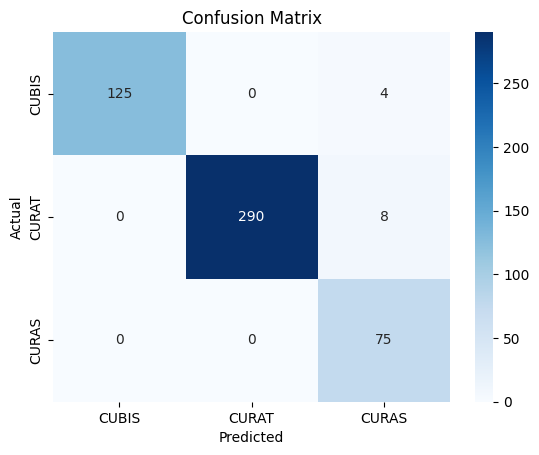

In [34]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['CUBIS', 'CURAT', 'CURAS'], yticklabels=['CUBIS', 'CURAT', 'CURAS'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()